In [1]:
import torch
torch.cuda.is_available()

/home/harvey/anaconda3/envs/peersac/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
import matplotlib.pyplot as plt
from cs285.infrastructure import log_utils as lu
import numpy as np
import os
plt.rcParams['figure.dpi']=400
colors = ['black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
GRAPH_DIR = "../../graphs/"

2023-01-12 15:20:55.837484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
all_exps = os.listdir(lu.DATA_FOLDER)
IDENTIFIER = "eplen1000"
plot_exps = [exp_name for exp_name in all_exps if IDENTIFIER in exp_name]
plot_exps

['peersacv3_eplen1000_eps0.7_HalfCheetah-v4_22-12-2022_05-33-28',
 'peersacv3_eplen1000_rwdscale5_eps1_HalfCheetah-v4_29-12-2022_03-30-34',
 'peersacv3_eplen1000_eps0.9_HalfCheetah-v4_24-12-2022_06-51-49',
 'peersacv3_eplen1000_replay1M_eps1_HalfCheetah-v4_23-12-2022_15-08-43',
 'peersacv3_eplen1000_eps0.5_HalfCheetah-v4_26-12-2022_20-02-27',
 'peersacv3_eplen1000_eps0.1_HalfCheetah-v4_27-12-2022_12-47-46',
 'peersacv3_eplen1000_eps0.1_HalfCheetah-v4_22-12-2022_23-11-32',
 'peersacv3_eplen1000_eps0.5_HalfCheetah-v4_22-12-2022_11-08-13',
 'peersacv3_eplen1000_eps1_HalfCheetah-v4_23-12-2022_23-11-58',
 'peersacv3_eplen1000_eps1_HalfCheetah-v4_23-12-2022_23-12-35',
 'peersacv3_eplen1000_eps0.3_HalfCheetah-v4_22-12-2022_17-12-12',
 'peersacv3_eplen1000_eps0.3_HalfCheetah-v4_27-12-2022_04-18-25',
 'peersacv3_eplen1000_eps1_HalfCheetah-v4_21-12-2022_18-35-15',
 'peersacv3_eplen1000_eps0.7_HalfCheetah-v4_24-12-2022_14-37-54',
 'peersacv3_eplen1000_eps0.7_HalfCheetah-v4_24-12-2022_14-36-57',
 

### SAC Peer Learning HW3 comparison experiment

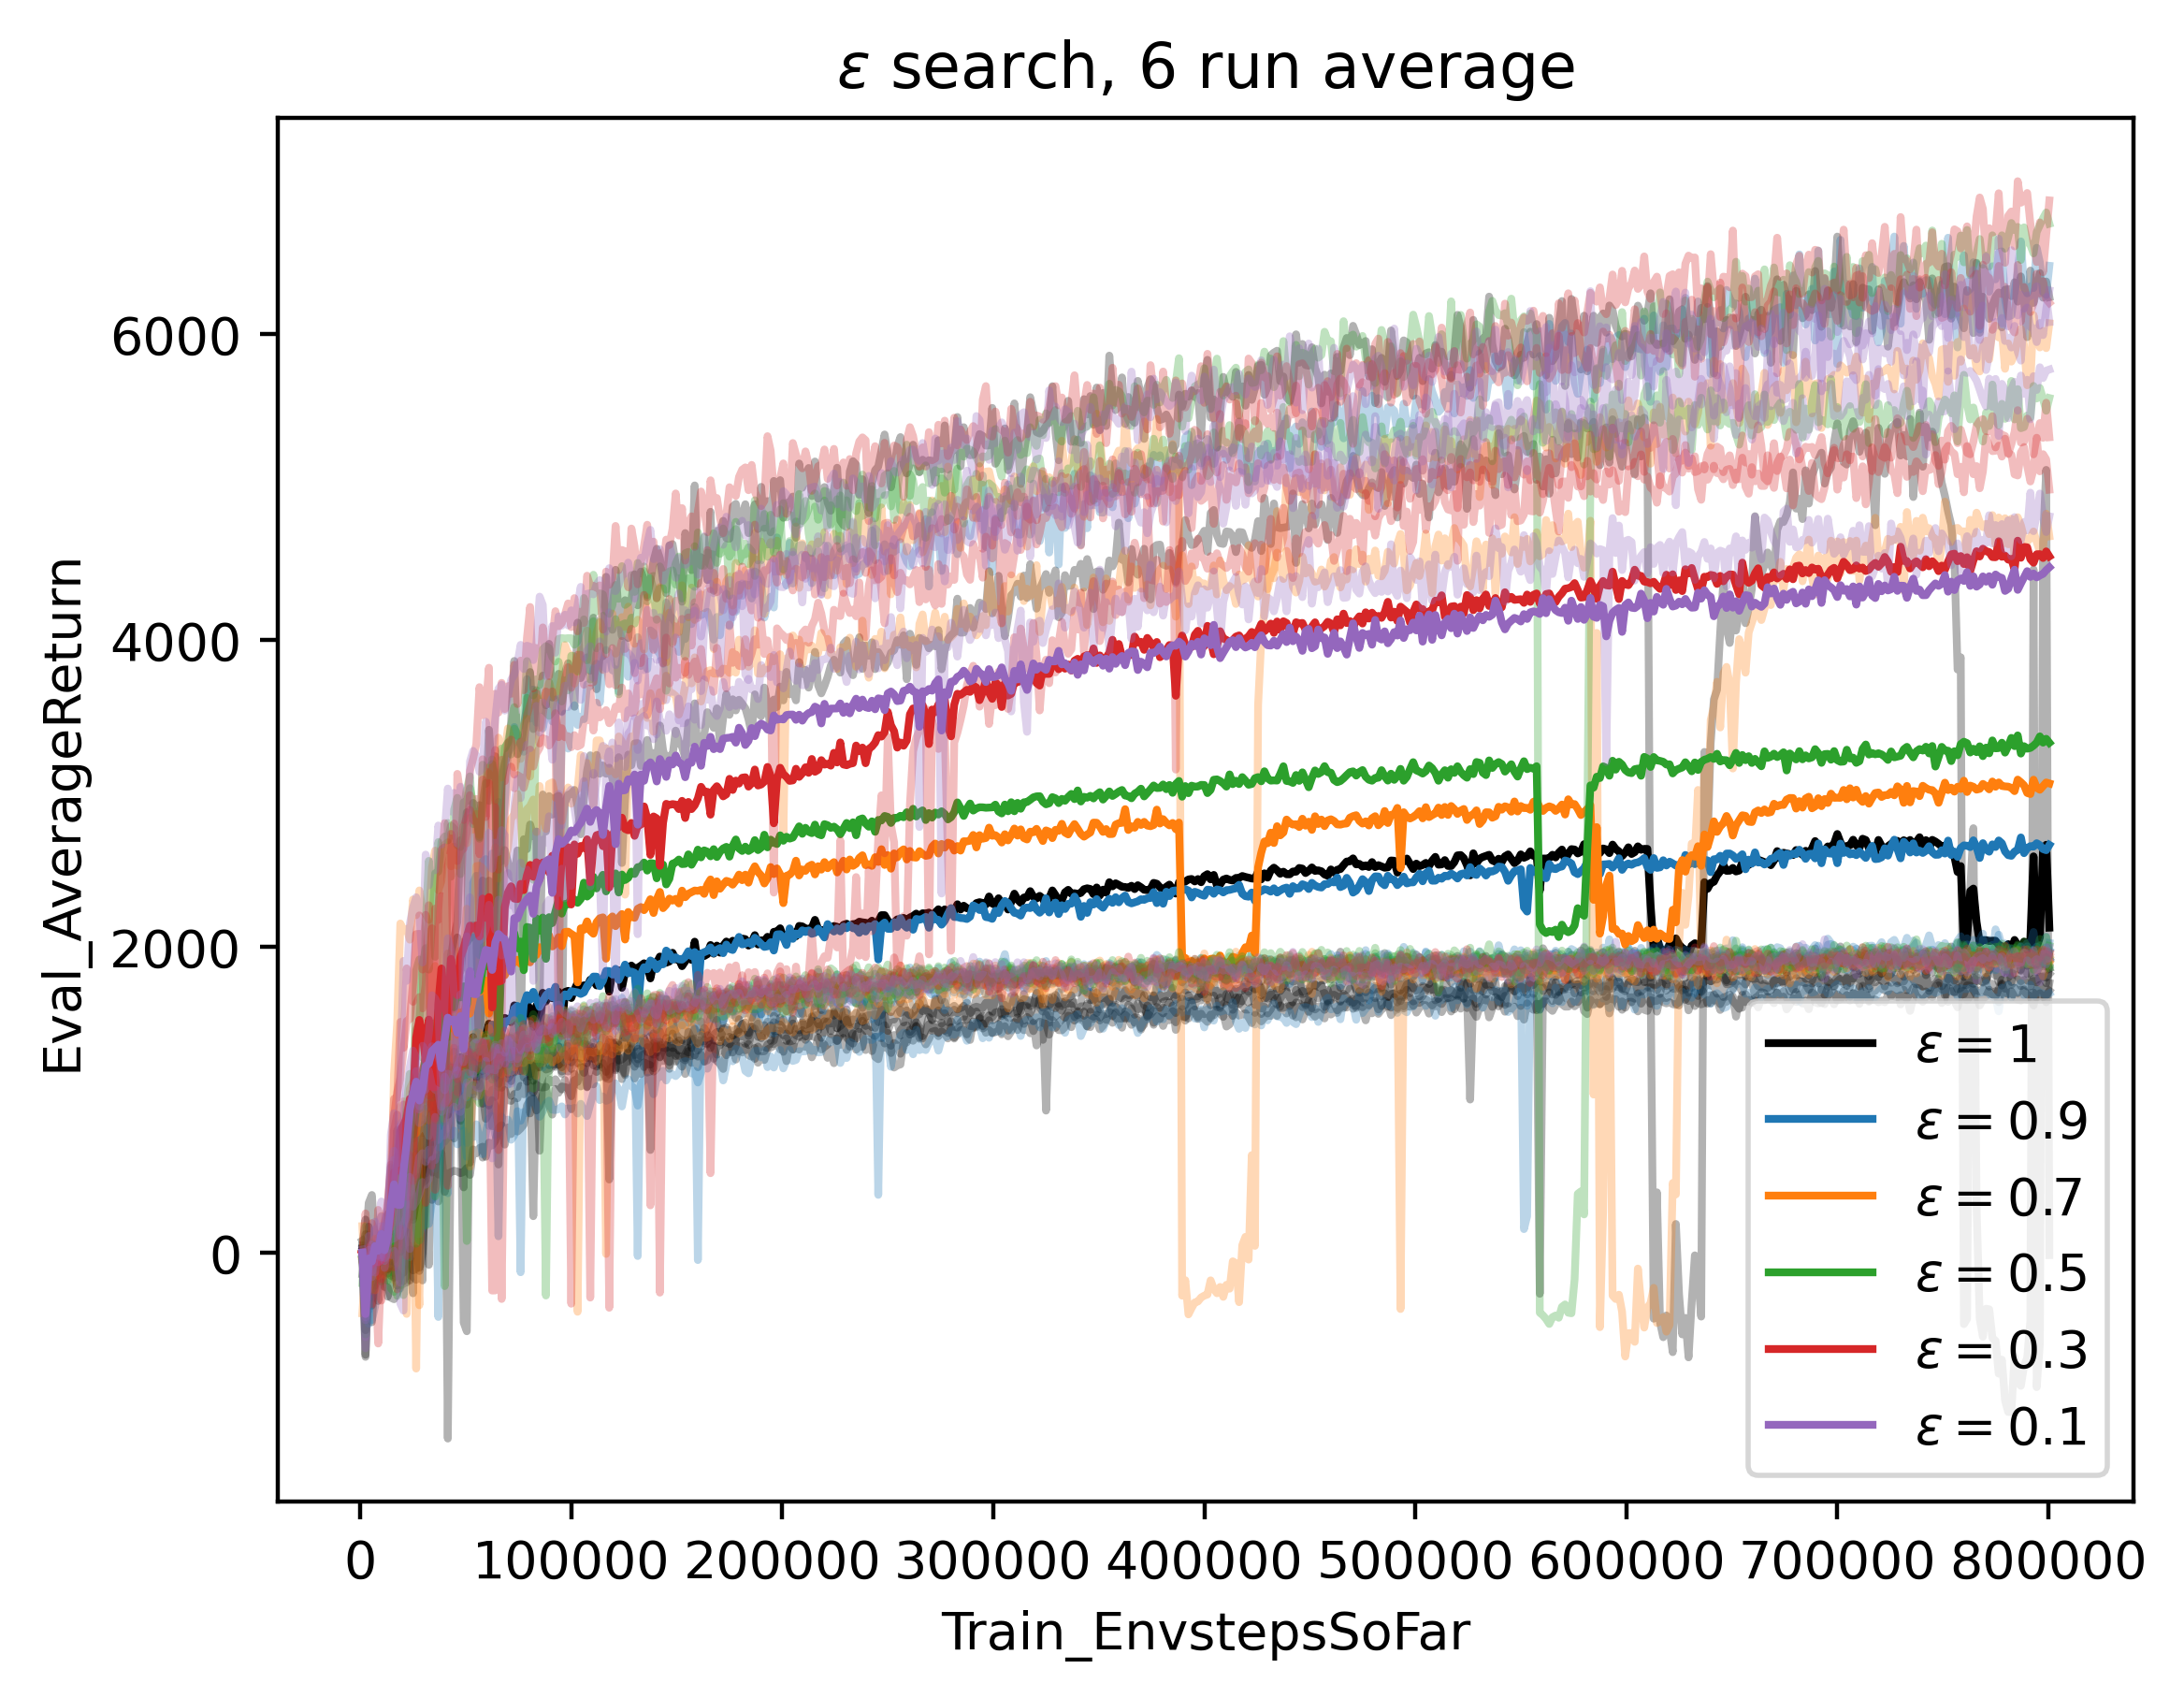

In [12]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
X_MAX = float('inf')
# X_MAX = 0.2e6
for ci, eps in enumerate(['1', '0.9', '0.7', '0.5', '0.3', '0.1']): 
    exp_names = [exp_name for exp_name in plot_exps if ('eps'+eps) in exp_name]
    series = []
    for exp_name in exp_names:
        series.extend(lu.getXYpeer(exp_name, X_label, Y_label, X_max=X_MAX))
    for i in range(len(series)):
        X, Y = series[i]
        plt.plot(X, Y, alpha=0.3, c=colors[ci]) 
    Y_avg = np.mean([Y for X, Y in series], axis=0)
    plt.plot(X, Y_avg, label=rf'$\epsilon = {eps}$', c=colors[ci]) 
    
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend(prop={'size': 10})
plt.title(r"$\epsilon$ search, 6 run average")
plt.savefig(GRAPH_DIR+"eps_search_eplen1000.png")
plt.show()

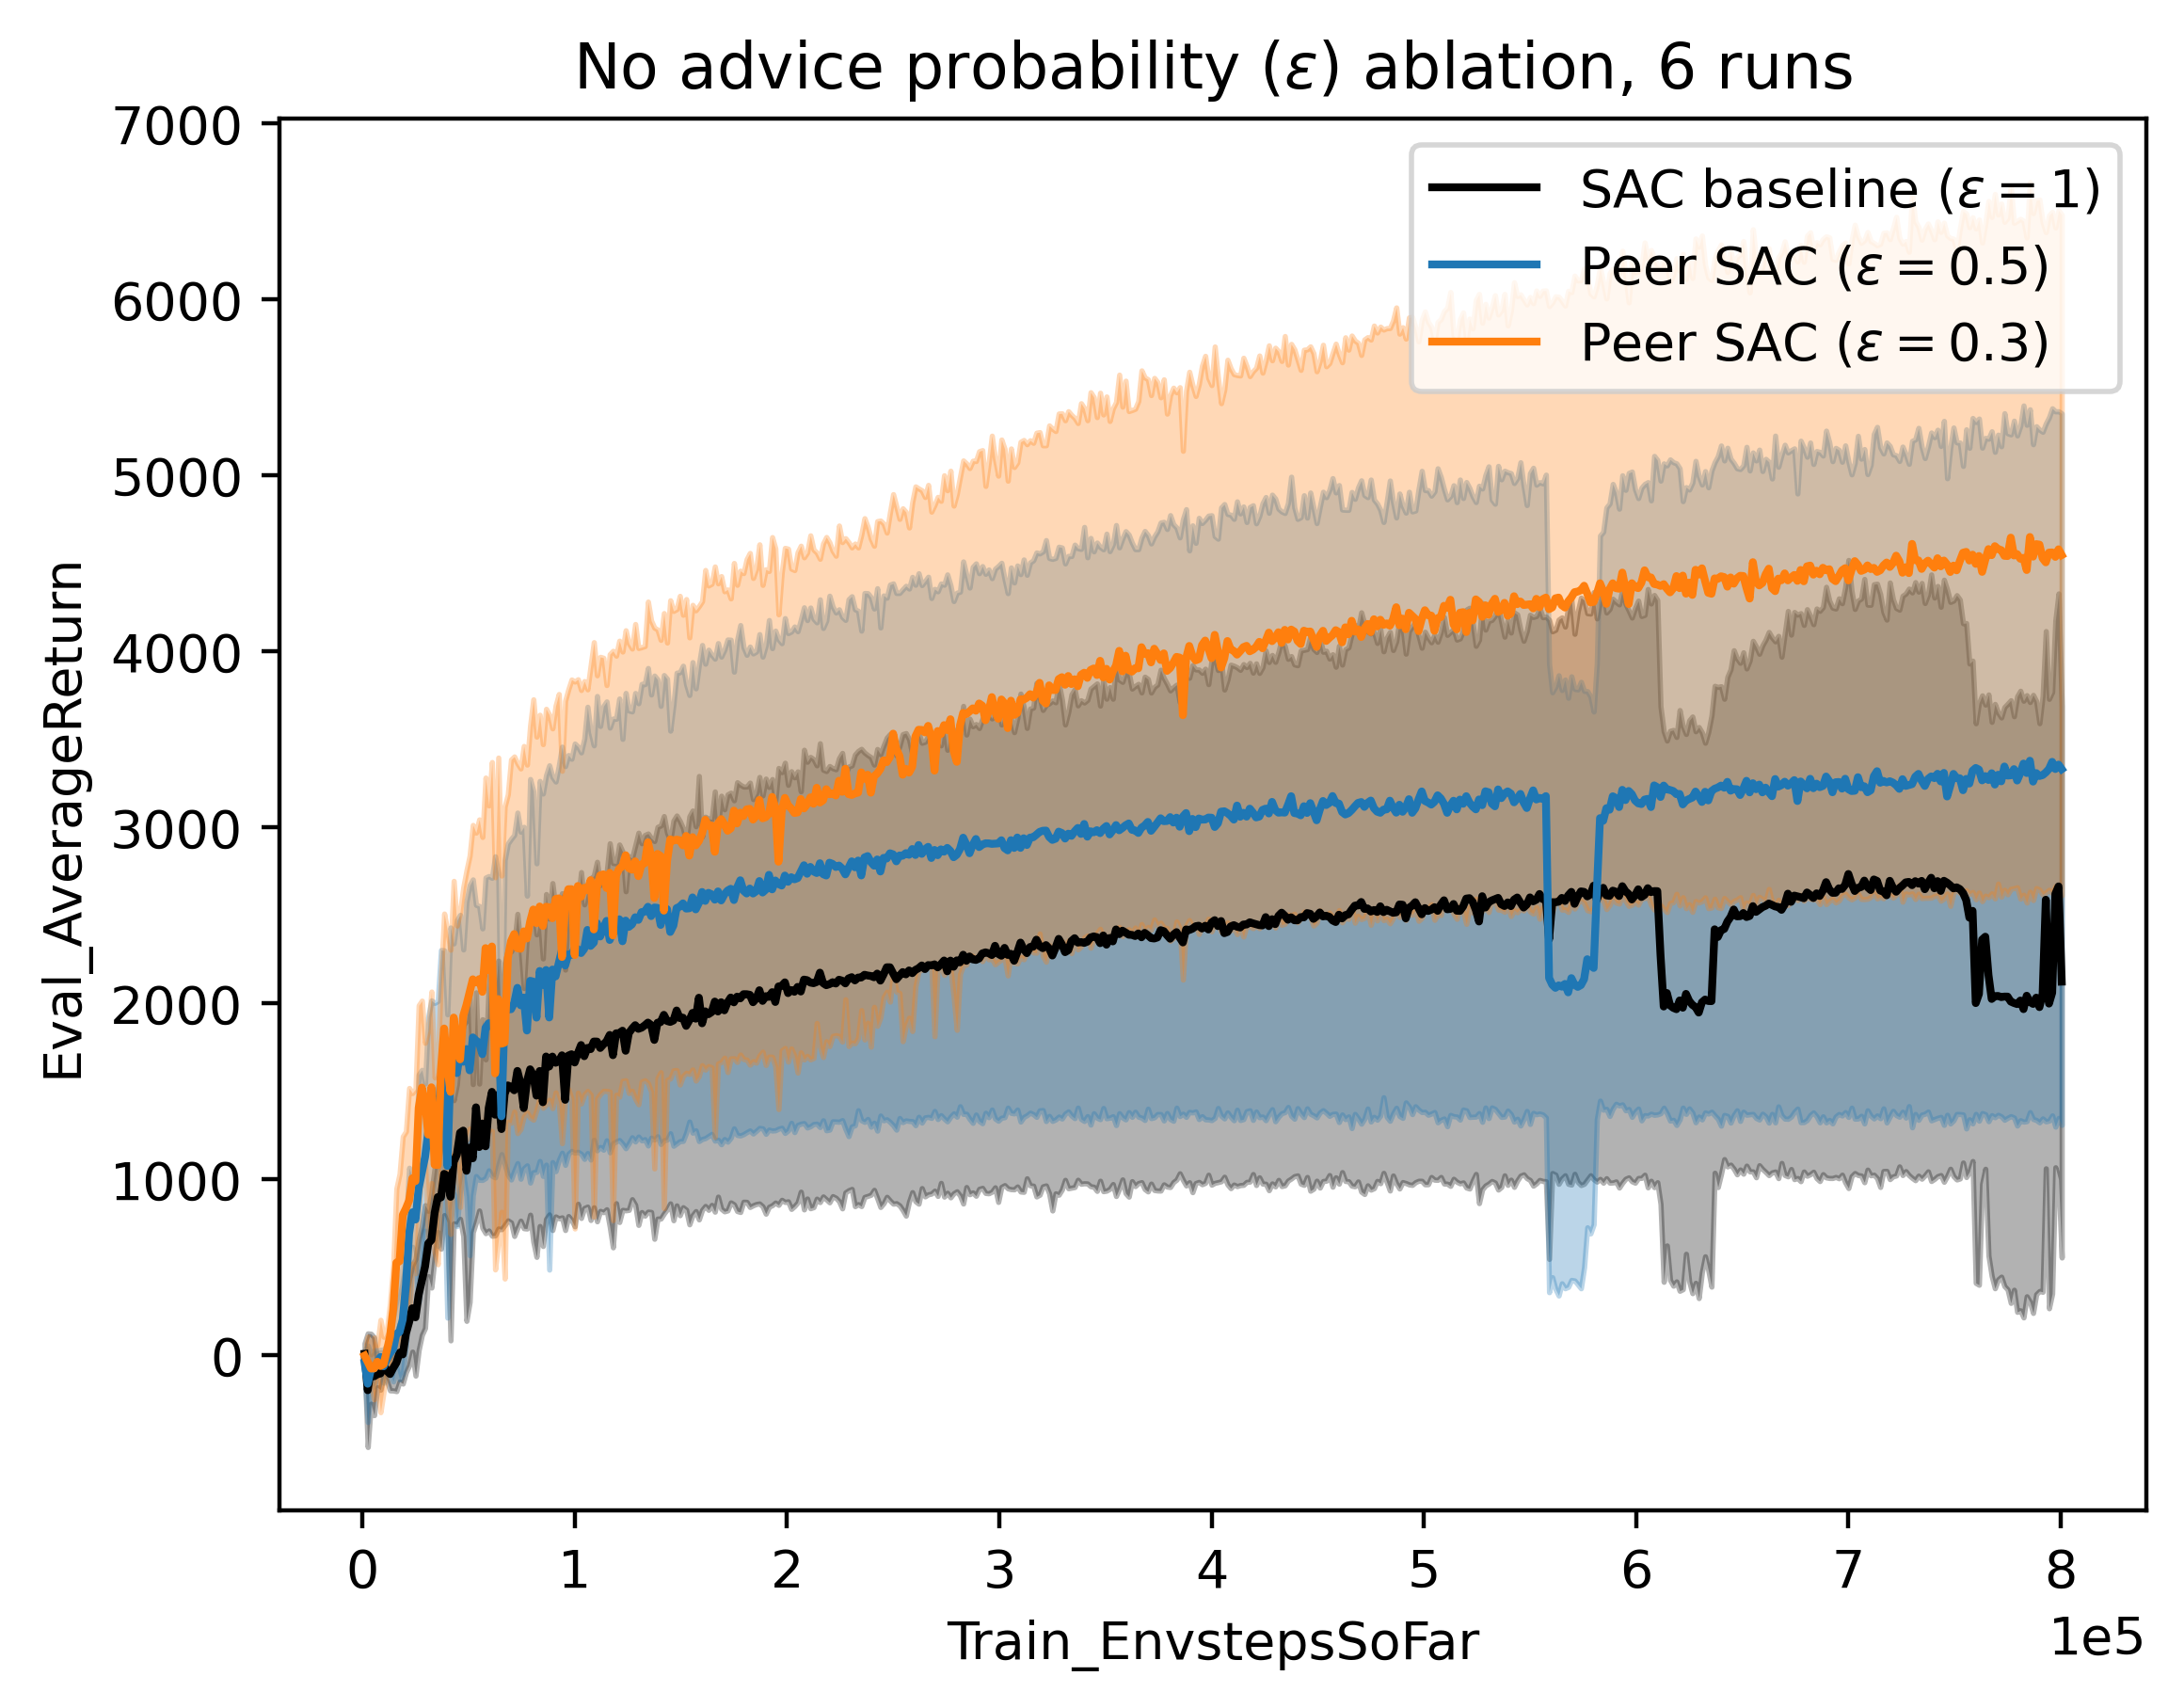

In [19]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
X_MAX = float('inf')
# X_MAX = 0.2e6
for ci, eps in enumerate(['1', '0.5', '0.3']): # '0.9',  '0.7', '0.1', 
    exp_names = [exp_name for exp_name in plot_exps if ('eps'+eps) in exp_name]
    series = []
    for exp_name in exp_names:
        series.extend(lu.getXYpeer(exp_name, X_label, Y_label, X_max=X_MAX))
    Y_avg = np.mean([Y for X, Y in series], axis=0)
    Y_std = np.std([Y for X, Y in series], axis=0)
    label = rf' ($\epsilon = {eps}$)'
    if eps=='1':
        label = "SAC baseline" + label
    else:
        label = "Peer SAC" + label
    plt.plot(X, Y_avg, label=label, c=colors[ci])
    plt.fill_between(X, Y_avg-Y_std, Y_avg+Y_std, alpha=0.3, color=colors[ci])
    
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(prop={'size': 10})
plt.title(r"No advice probability ($\epsilon$) ablation, 6 runs")
plt.savefig(GRAPH_DIR+"advice_ablation.png")
plt.show()